## Phase 3.23

# Gradient Descent

## Objectives
* Understand the general process of gradient descent with respect to RSS(cost function) 
* Be able to define parameters, step size and learning rate
* Use OOP to create and apply a gradient descent class with linear regression 


### Simple example of Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data = data.iloc[[149, 31, 198, 54, 76]]
X = data['TV']
y = data['Sales']
print(data)

        TV  Radio  Newspaper  Sales
150   44.7   25.8       20.6   10.1
32   112.9   17.4       38.6   11.9
199  283.6   42.0       66.2   25.5
55   262.7   28.8       15.9   20.2
77    27.5    1.6       20.7    6.9


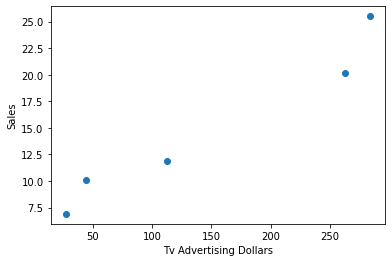

In [4]:
plt.scatter(X, y)
plt.ylabel('Sales')
plt.xlabel('Tv Advertising Dollars')
plt.show()

In [5]:
data.drop(['Radio', 'Newspaper'], axis=1)

,TV,Sales
150,44.7,10.1
32,112.9,11.9
199,283.6,25.5
55,262.7,20.2
77,27.5,6.9


In [6]:
def regression_formula(x, slope, intercept):
    return slope * x + intercept

Now, we need an initial starting point for gradient descent. Let's choose 0.1 as our initial slope and 0 for our intercept. 

In [7]:
slope1 = 0.1
intercept1 = 0

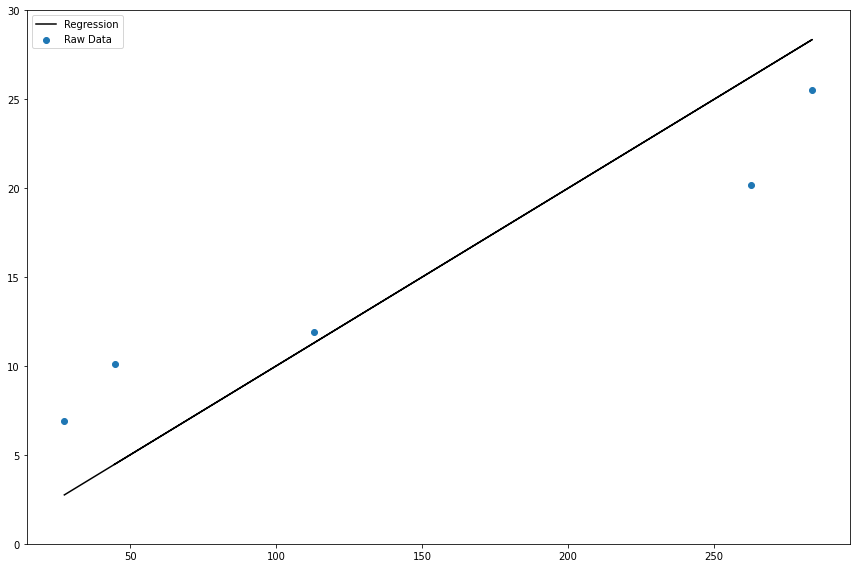

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X, y, label='Raw Data')
ax.set_ylim([0, 30])
ax.plot(X, 
         regression_formula(X, slope1, intercept1), 
         color='k', 
         label='Regression')
ax.legend()
fig.tight_layout()

In [9]:
print(regression_formula(X, slope1, intercept1))

150     4.47
32     11.29
199    28.36
55     26.27
77      2.75
Name: TV, dtype: float64


**Arithmatically, our function looks like this:**

$\large \text{Sales} = 0.1(\text{TV} ) + 0 $
    
Now, let's calculate the Sum of Squared Error(Cost function) for this line by plugging in the predicted x-value into our formula and getting the predited y-value and substracting it from the actual y-value. 

![](https://github.com/justmarkham/DAT4/raw/068d887e4be2eedb1b958b345ae097153f762d75/notebooks/08_estimating_coefficients.png)

## Steps to find the optimal slope and intercept of a line of best fit using RSS as our cost function 

1. Take the derivative of the loss function for each parameter(gradient).
2. Pick random values for the parameters. 
3. Plug the parameter values into the derivatives. 
4. Calculate the step sizes (slope * learning rate) 
5. Calculate new parameters (old parameters - step size) 
6. Repeat steps 3-5 until max number of steps is reached or minimum step size is reached. 

<img src='images/convex_cost_function.jpeg'>

![](https://github.com/Amberlynnyandow/study-group-content/blob/master/module_3/week_2_PT/Intro-gradient-descent.jpg?raw=1)
![](https://github.com/Amberlynnyandow/study-group-content/blob/master/module_3/week_2_PT/walk-thru-GD.jpg?raw=1)
![](https://github.com/Amberlynnyandow/study-group-content/blob/master/module_3/week_2_PT/taking_partial_derivatives_GD.jpg?raw=1)

## Derivatives in gradient descent 
**A derivative tells us how a function is changing at any given point in time. They calculate the rate of change** 



## Rules for taking Derivatives 

1. **Power Rule** - $$\Large f(x) = x^r $$

Then, the derivative is: 
$$\Large f'(x) = r*x^{r-1} $$

2. **Constant factor rule** - $$\Large f(x) = 2x^2 $$


$$\Large f'(x) = 2*\frac{\Delta f}{\Delta x} x^{2} = 2*2*x^{2-1} = 4x^1 = 4x $$

3. **Addition Rule** - To take a derivative of a function that has multiple terms, simply take the derivative of each of the terms individually.  So for the function above, 

$$\Large f(x) = 4x^3 - x^2 + 3x $$

$$\Large f'(x) = 12x^2 - 2x + 3  $$  

4. **Chain Rule** - allows us to take partial derivatives of a function with respect to the other variables.

## EXERCISE: 
**Use OOP to create a gradient descent class with Linear Regression using RSS as a Cost Function**

### Reminder: Steps to find the optimal slope and intercept of a line of best fit using SSR as our cost function 
1. Take the partial derivative of the loss function for each parameter(gradient).
2. Pick random values for the parameters. 
3. Plug the parameter values into the derivatives. 
4. Calculate the step sizes (slope * learning rate) 
5. Calculate new parameters (old parameters - step size) 
6. Repeat steps 3-5 until max number of steps is reached or minimum step size is reached. 



In [10]:
class GradientDescentRSS:
    def __init__(self, learning_rate=0.1, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.m = None
        self.b = None
    
    def fit(self, X, y, m=0, b=0):
        n = X.shape[0]
        for _ in range(self.iterations):
            # Calculate the gradients.
            b_gradient = -2 * np.sum(y - (m*X + b))/n
            m_gradient = -2 * np.sum(X*(y-(m*X + b)))/n
            
            # Take a step.
            b = b -(self.learning_rate * b_gradient)
            m = m -(self.learning_rate * m_gradient)
            
        self.m, self.b = m, b
    
    def predict(self, X):
        return self.m*X + self.b

In [11]:
# Create a cloud of points normally distributed around the line y=x 
np.random.seed(42)


X = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5)
y = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25)

In [12]:
# Instantiate and fit gradient descent to our data.
lr = GradientDescentRSS()
lr.fit(X, y)

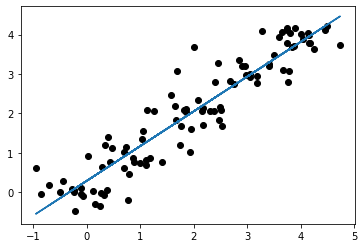

In [13]:
plt.scatter(X, y, color='black')
plt.plot(X, lr.predict(X));

In [14]:
# What are the values of our intercept and slope?
print(lr.b)
print(lr.m)

0.28875762105975056
0.8812889601846241
